In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
from scipy.optimize import curve_fit
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

In [21]:
def double_exponent(t,T0,ΔT1,ΔT2,t0,τ1,τ2):
    exp1 = (t-t0)/τ1
    exp2 = (t-t0)/τ2
    return T0 + ΔT1*(1 - np.exp(-exp1)) + ΔT2*(1-np.exp(-exp2))

In [22]:
data = pd.read_excel('./data/gruppo1_termocamera.xlsx',sheet_name='210mW',header=12,skiprows=['A','B','C'])
data.head()

,Data,Ora,Millisecondi,Base tempo relativa,Sp1.Valore
0,2025-03-26,11:41:55,666,0.000,25.323786
1,2025-03-26,11:41:55,800,0.134,25.287195
2,2025-03-26,11:41:55,866,0.200,25.274994
3,2025-03-26,11:41:56,0,0.334,25.274994
4,2025-03-26,11:41:56,133,0.467,25.238388


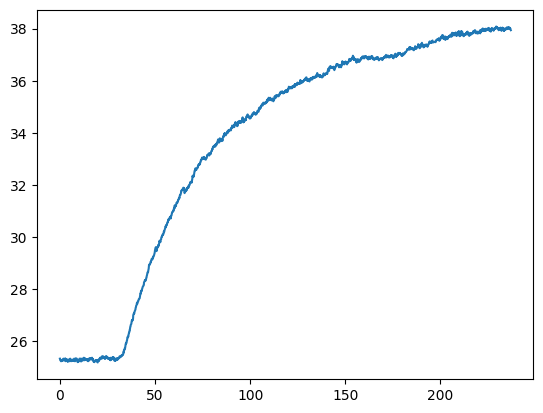

In [23]:
t = data['Base tempo relativa'].to_numpy()
T = data['Sp1.Valore'].to_numpy()

plt.plot(t,T)
plt.show()

In [24]:
T0 = np.mean(T[0:250])
sigmaT0 = np.std(T[0:250])
errT0 = sigmaT0/np.sqrt(250)

In [25]:
t0 = 32
def fit_double_exponent(t,ΔT1,ΔT2,τ1,τ2):
    exp1 = (t-t0)/τ1
    exp2 = (t-t0)/τ2
    result = np.where(
        t < t0,
        T0,
        T0 + ΔT1 * (1 - np.exp(-exp1)) + ΔT2 * (1 - np.exp(-exp2))
    )
    return result

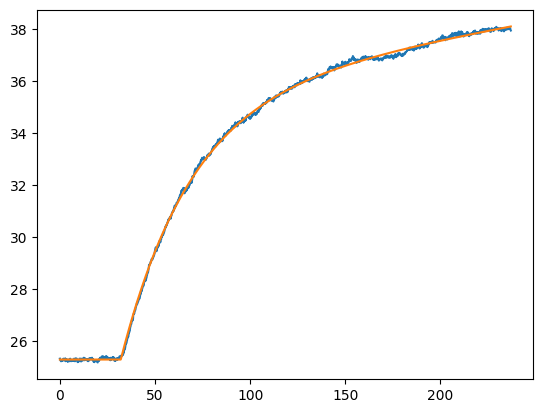

In [26]:
popt, pcov = curve_fit(fit_double_exponent, t, T, p0=[5,5,86,86])

plt.plot(t,T)
plt.plot(t,fit_double_exponent(t,*popt))
plt.show()

In [28]:
parameters = ['T0','t0','ΔT1','ΔT2','τ1','τ2']
fit_results = pd.DataFrame({
	'Parameter': parameters,
	'Value': [T0] + [t0] + list(popt),
	'Sigma': [errT0] + [0] + list(np.sqrt(np.diag(pcov)))
})
display(fit_results)

,Parameter,Value,Sigma
0,T0,2.529026e+01,3.076218e-03
1,t0,3.200000e+01,0.000000e+00
2,ΔT1,1.017169e+01,2.293060e-02
3,ΔT2,1.602804e+04,6.761958e+05
4,τ1,3.695033e+01,1.176788e-01
5,τ2,1.228193e+06,5.182252e+07


In [ ]:
pcov_df = pd.DataFrame(
    pcov,
    columns=['ΔT1', 'ΔT2', 'τ1', 'τ2'],
    index=['ΔT1', 'ΔT2', 'τ1', 'τ2']
)
display(pcov_df)

,ΔT1,ΔT2,τ1,τ2
ΔT1,0.000526,4.505334e+03,0.002519,3.455379e+05
ΔT2,4505.334197,4.572407e+11,12394.597930,3.504217e+13
τ1,0.002519,1.239460e+04,0.013848,9.511432e+05
τ2,345537.943340,3.504217e+13,951143.237056,2.685574e+15
